# Discrete Fourier Transform (DFT)


ใน tutorial ที่แล้ว เราได้เรียนรู้ว่าเราสามารถศึกษา continuous-time signal $x(t)$ ในทางปฏิบัติได้ ผ่านการเก็บข้อมูลมาแค่บางส่วน (sampling) ถ้าหากเรามี sampling rate ที่สูงพอ ข้อมูล discrete-time signal หรือ $x[n]=x(nT)$ ที่เราเก็บมาจะมีข้อมูลของ $x(t)$ อย่างครบถ้วน ทำให้เราสามารถทำการวิเคราะห์ $x[n]$ แทน $x(t)$ ได้ โดยที่ใช้ทรัพยากรการคำนวณที่มีอยู่อย่างจำกัดได้

---

ในการศึกษา signal ใด ๆ หนึ่งในวิธีที่ได้รับความนิยมมาก คือ การดูว่า signal นั้นเกิดจากการเอา signal มีคลื่นความถี่เท่าไหร่มาผสมกันบ้าง ผ่านการใช้ Discrete Fourier Transform (DFT)

กำหนดให้เรามี discrete time signal $x[n]$ เราสามารถใช้ DFT แปลง $x[n]$ จาก time domain ให้อยู่ใน frequency domain ได้ โดยเราจะเรียก signal ที่ถูกแปลงค่าว่า $X[k]$ ซึ่งผลลัพธ์ที่ได้ จะมีโอกาสมีค่าเป็นจำนวนเชิงซ้อน หรือจำนวนจริง ก็ได้

หาก $X[k]$ มีค่าไม่เท่ากับศูนย์ แปลว่า time signal ที่เรากำลังวิเคราะห์อยู่มี signal ที่มีคลื่นความถี่เท่ากับ $2π/k$ เป็นส่วนประกอบ

ใน `scipy` เราสามารถคำนวณ DFT ของ signal ใด ๆ ด้วย Fast Fourier Transform (FFT) algorithm ผ่านการเรียกใช้ฟังก์ชัน `fft` ตามตัวอย่างด้านล่าง


**หมายเหตุ**
1. Fast Fourier Transform (FFT) เป็นเทคนิคที่ถูกพัฒนามาเพื่อคำนวณ DFT ได้อย่างรวดเร็ว
2. ถึงแม้ว่าใน Brain Code Camp เราจะใช้ FFT ในการแปลง signal จาก time domain ไปสู่ frequency domain แต่จริง ๆ แล้ว FFT สามารถใช้ในการแปลง signal จาก domain ตั้งต้นอะไรก็ได้ เช่น ในกรณีของรูปภาพ (2D signal) ซึ่งเราจะเรียกว่าอยู่ใน spatial domain ก็สามารถถูกแปลงไปสู่ spatial frequency domain ได้ผ่านการใช้ FFT


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq, ifft
import math

เตรียมฟังก์ชันไว้สำหรับใช้คำนวณ DFT (ผ่านการใช้ `fft` ของ `scipy`) และแสดงผลลัพธ์ที่เกิดขึ้น

In [2]:
# ฟังก์ชันสำหรับสร้าง time signal ซึ่งเป็นฟังก์ชัน sine ที่มีความถี่ freq, มี sampling period คือ f_s และมีระยะเวลาในแกนเวลาเท่ากับ duration
def generate_sine_wave(freq, f_s, duration):

    # คำนวณค่า sampling period (ระยะห่างระหว่างจุดที่เก็บมาสองจุดในแกนเวลา)
    T = 1/f_s

    # คำนวณจำนวนจุดที่มีใน signal
    num_points = math.floor(f_s*duration)

    # สร้างแกนเวลา
    t = np.linspace(0.0, num_points*T, num_points, endpoint=False)

    # สร้าง signal x(t) = sin(2*pi*freq*t)
    x = np.sin(2*np.pi*freq*t)

    return x, t


def compute_DFT(x_sampled, t_sampled, f_s, duration):

    # คำนวณจำนวนจุดที่มีใน signal
    num_points = x_sampled.shape[0]

    # ใช้ FFT ในการแปลงข้อมูลจาก time domain ไปเป็น frequency domain
    X_fft = fft(x_sampled)

    # สร้างแกนความถี่ (frequency)
    freq = np.fft.fftfreq(num_points, d=1/f_s)

    return X_fft, freq


def plot_discrete_time_freq_signal(x_sampled, X_fft, freq):

    fig, ax = plt.subplots(3,1, figsize=(15, 12))
    fig.tight_layout(pad=5.0)

    # โดยปกติแล้วเวลาเรากราฟ discrete-time signal เราจะใช้ n เป็นแกน x แทนที่จะใช้เวลาจริงในแกน x
    ax[0].scatter(range(x_sampled.shape[0]), x_sampled, c='r')
    ax[0].plot(range(x_sampled.shape[0]), x_sampled, c='r', alpha=0.2) # plot เส้นลากผ่านจุดที่เก็บมา เพื่อให้เห็นหน้าตาของข้อมูลโดยคร่าว ๆ
    ax[0].set(xlabel='n', ylabel='x[n]')
    ax[0].set_title(f"Discrete time signal x[n] sampled from x(t)")
    ax[0].grid(True)

    # Plot magnitude ของ X[k]
    ax[1].plot(freq, np.abs(X_fft),'b')
    ax[1].set(xlabel='Frequency (Hz)',ylabel='|X[k]|')
    ax[1].set_title(f"X[k], DFT of x[n]")
    ax[1].set_xticks(np.arange(np.min(freq), np.max(freq), 20))
    ax[1].grid(True)

    # Plot phase ของ X[k]
    ax[2].plot(freq, np.unwrap(np.angle(X_fft)),'b')
    ax[2].set(xlabel='Frequency (Hz)', ylabel='Phase of X[k]')
    ax[2].set_title(f"X[k], DFT of x[n]")
    ax[2].set_xticks(np.arange(np.min(freq), np.max(freq), 20))
    ax[2].grid(True)

    plt.show()

ทดลองกับกรณีที่ signal เป็นฟังก์ชัน sine ที่มีค่าความถี่เดียว

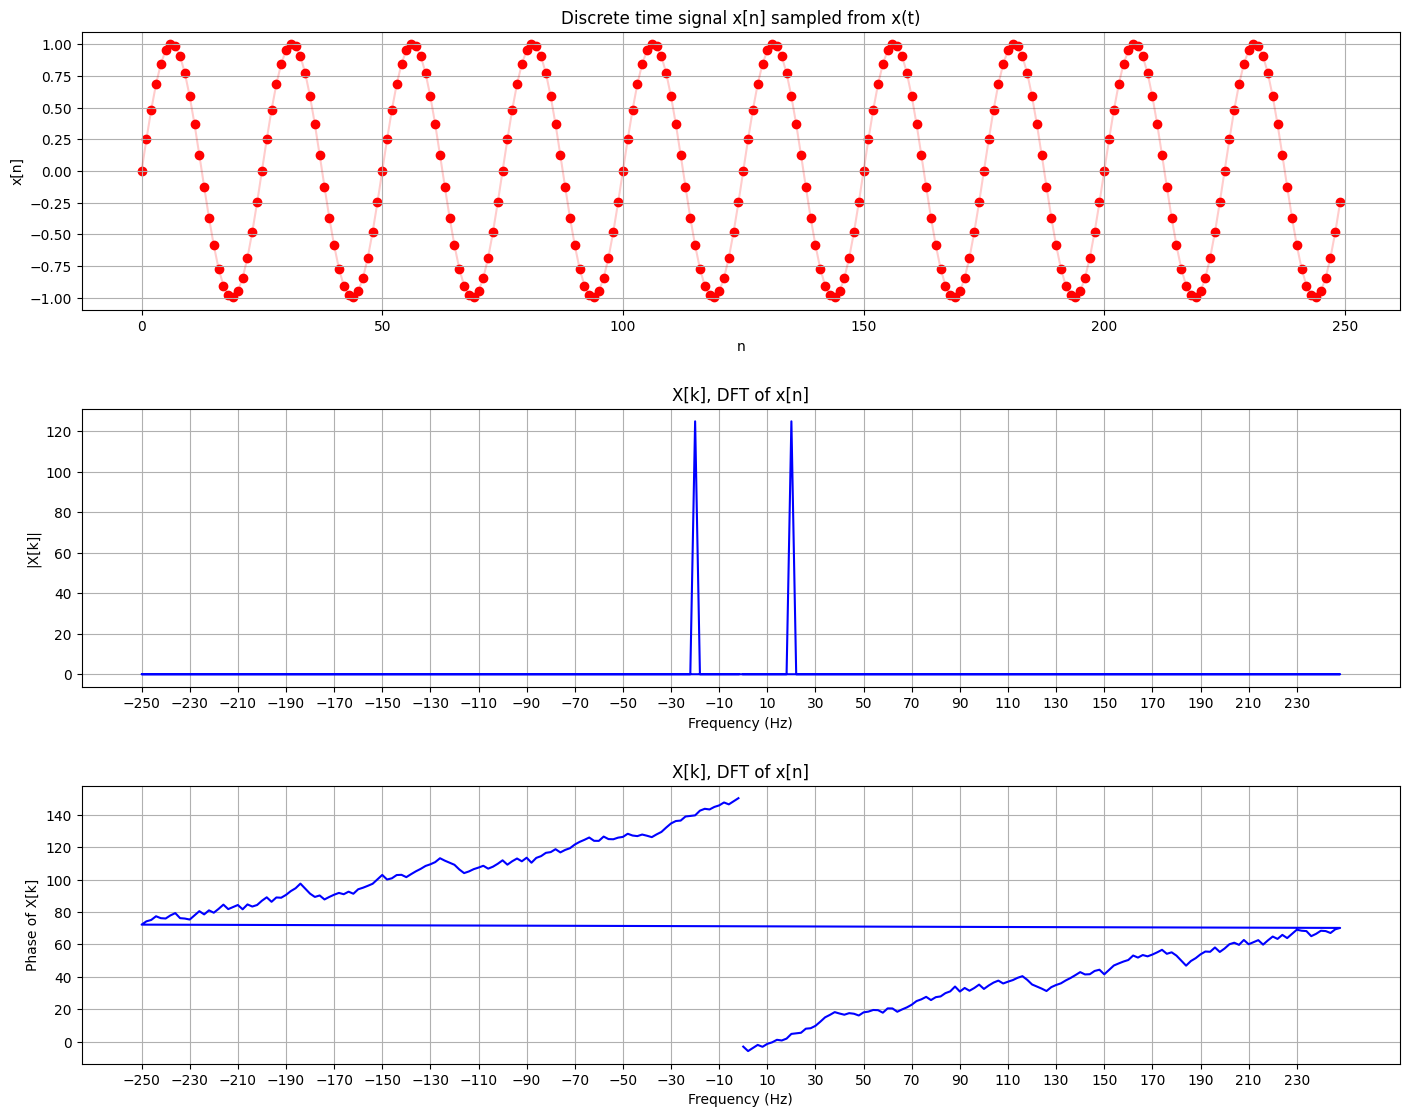

In [3]:
freq_sine = 20 # ค่าความถี่ของฟังก์ชัน sine (Hz)
f_s = 500 # อัตราการเก็บข้อมูล หรือ sampling rate (samples/sj หรือ Hz)
duration = 0.5 # ระยะเวลาของ signal (s)

# สร้าง time signal ที่เป็นฟังก์ชัน sine ที่มีความถี่ freq_sine Hz ที่มีค่า sampling rate อยู่ที่ f_s แสดงถึง discrete time signal ที่เก็บมา
x_sampled, t_sampled = generate_sine_wave(freq=freq_sine, f_s=f_s, duration=duration)

# คำนวณ DFT ของ x[n] และ แกน freq สำหรับใช้ plot
X_fft, freq = compute_DFT(x_sampled, t_sampled, f_s, duration)

# Plot ผลที่ได้
plot_discrete_time_freq_signal(x_sampled, X_fft, freq)

จากตัวอย่างด้านบนจะเห็นได้ว่า DFT ของ signal ด้านบน $X[k]$ มี peak อยู่ที่ 20 Hz (และ -20 Hz) พอดี โดยที่ไม่มีความถี่อื่นๆ เลย สอดคล้องกับ $x[n]$ ซึ่งเป็นฟังก์ชัน sine ที่ความถี่ 20 Hz

**หมายเหตุ** โดยปกติแล้ว หากเราใช้ sampling rate ที่มีค่าเป็น $f_s$
เรามักจะแสดงผลของ DFT โดยกำหนดให้แกน frequency มีค่าความถี่น้อยสุดอยู่ที่ $-f_s$ และ $f_s$

<br><br>

---

ต่อไปเรามาลองทดสอบดู signal $x[n]$ ที่มีค่าความถี่มากกว่า 1 ค่า เช่น

$x[n]$ คือ signal ที่ถูกเก็บข้อมูลมาจาก $x(t)=sin(2π*20t) + 0.5 sin(2π*50t)$

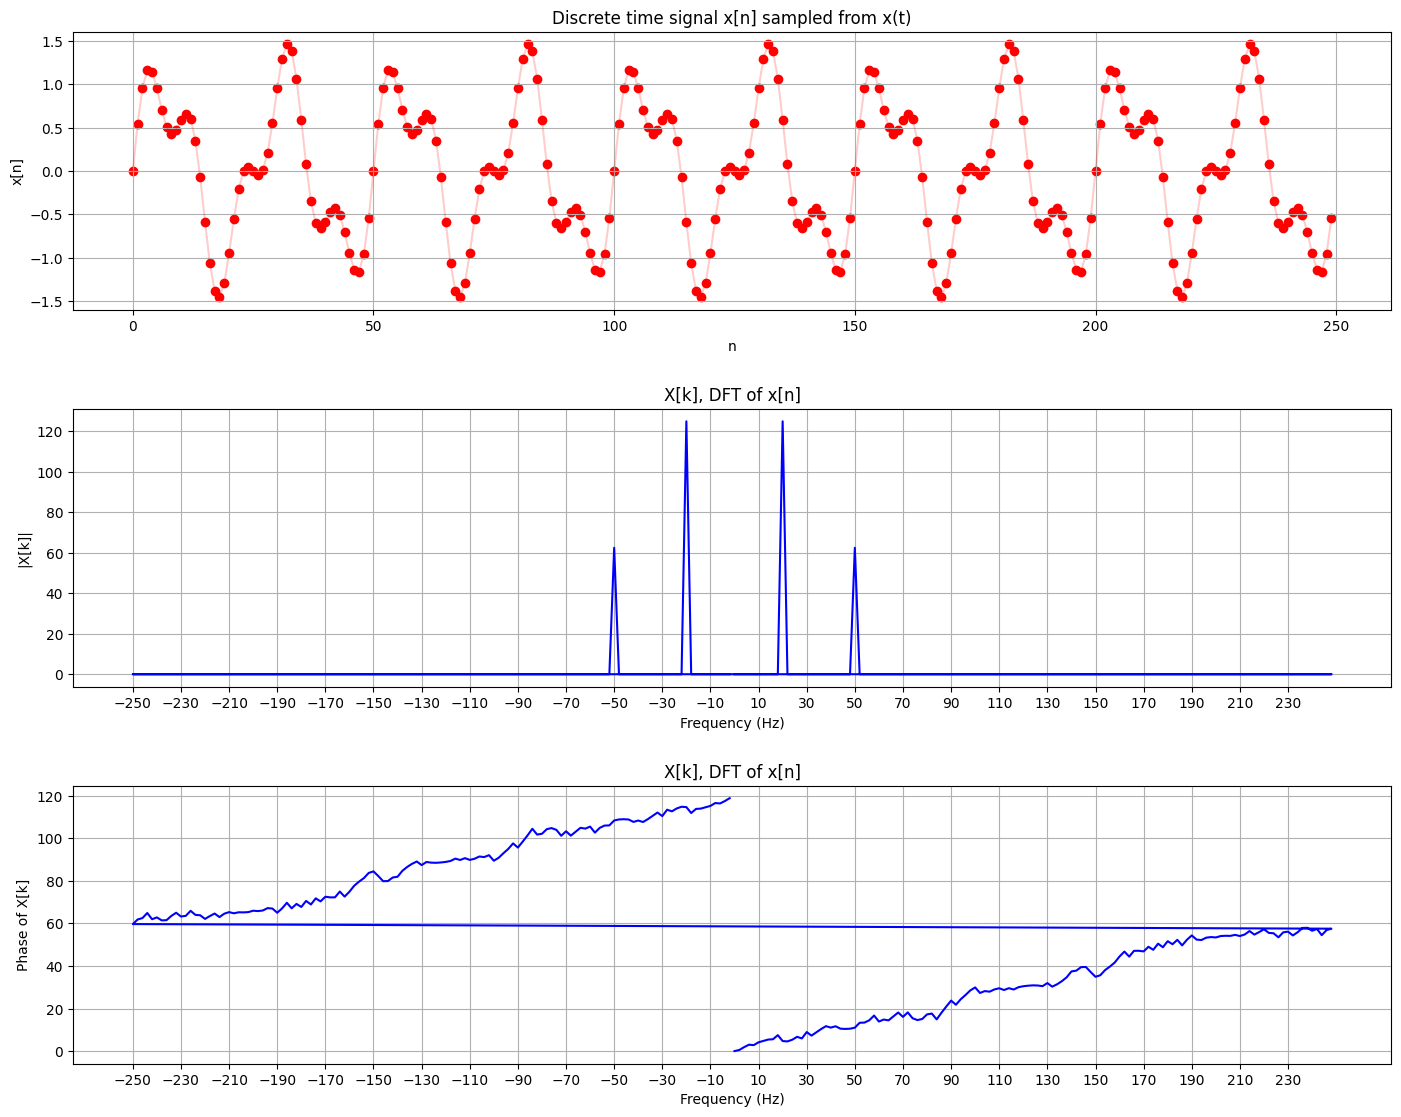

In [4]:
# กำหนดค่า sampling rate
f_s = 500

# สร้าง discrete time signal ที่เป็นฟังก์ชัน sine ที่มีความถี่ 20 Hz
x_sampled_20Hz, t_sampled = generate_sine_wave(freq=20, f_s=f_s, duration=duration)

# สร้าง discrete time signal ที่เป็นฟังก์ชัน sine ที่มีความถี่ 50 Hz
x_sampled_50Hz, t_sampled = generate_sine_wave(freq=50, f_s=f_s, duration=duration)

# สร้าง signal ที่เกิดจากการนำเอา signal ด้านบนทั้งสองตัวมาบวกกัน โดย signal ที่มีความถี่ 50 Hz จะถูกลด amplitude มาครึ่งหนึ่ง
x_combined = x_sampled_20Hz + 0.5*x_sampled_50Hz

# คำนวณ DFT ของ signal นี้
X_fft, freq = compute_DFT(x_combined, t_sampled, f_s, duration)

# แสดงผล
plot_discrete_time_freq_signal(x_combined, X_fft, freq)

จากกราฟด้านบนจะเห็นได้ว่า DFT ของ signal มีคุณสมบัติ ที่สอดคล้องกับ คุณสมบัติของ $x[n]$ คือ signal ที่ถูกเก็บข้อมูลมาจาก $x(t)=sin(2π*20t) + 0.5 sin(2π*50t)$ ดังนี้

*   มี peak อยู่ที่ทั้ง $\pm 20$ Hz และ $\pm 50$ Hz
*   peak ที่ความถี่ $\pm 50$ Hz มี สูงแค่ครึ่งเดียวของ peak ที่ความถี่ $\pm 20$ Hz


ถ้าหากเรามอง signal ในเรา time domain ก็อาจจะบอกได้ยากว่า signal นี้เกิดจากการนำเอา signal ที่มีความถี่เท่าไหร่ มารวมกันบ้าง โดยเฉพาะในกรณีที่ signal เราซับซ้อนมาก ๆ ซึ่ง DFT ก็เป็นหนึ่งในเทคนิคที่จะมาช่วยเราดูข้อมูลในส่วนนี้ได้

<br><br>

สมมติว่าเราสืบทราบมาว่า signal จากตัวอย่างข้างบน มีที่มาจากสัญญาณสมองที่มีความถี่ไม่เกิน 30 Hz เท่านั้น แต่พอเรามาวิเคราะห์ใน frequency domain เรากลับเจอความถี่ที่ 20 Hz และ 50 Hz

ในการเก็บข้อมูลทาง biomedical เรามักจะพบเจอสัญญาณรบกวนที่เรียกว่า Powerline noise ซึ่งเป็นสัญญาณที่มักมีค่าหลักอยู่ที่ 50 Hz และ 60 Hz ขึ้นอยู่กับสถานที่ที่เราเก็บข้อมูล

เนื่องจากสถานการณ์นี้กำหนดให้เราสนใจสัญญาณสมองที่มีความถี่ไม่เกิน 30 Hz เท่านั้น และ เราพบว่ามีสัญญาณแปลก ๆ ที่ค่า 50 Hz ซึ่งคาดการณ์ว่าจะเป็น powerline noise ทำให้เวลาเราจะนำเอา signal นี้ไปวิเคราะห์หรือประมวลผลต่อ เราควรกำจัดสัญญาณรบกวนที่เราเจอที่ 50 Hz ทิ้งไป


<br><br>

ต่อมา เรามาลองลบสัญญาณที่ 50 Hz นี้ โดยการ

1.   แปลงข้อมูลให้ไปอยู่ใน frequency domain โดยการใช้ `fft` ($X[k] = \text{FFT}\{x[n]\}$)

2.   สร้างฟังก์ชัน $W[k]$ ที่มีค่าเป็น 0 ตรงค่าความถี่ $k$ ที่เราต้องการกำจัด และมีค่าเป็น 1 ตรงค่าความถี่ $k$ ที่เราต้องการเก็บไว้ ในที่นี่เราจะเรียก $W$ ว่าเป็น window หรือ filter

3.   คำนวนผลลัพธ์โดยการใช้สมการ $X_\text{filtered}[k] = X[k] \times W[k]$ สำหรับทุกค่า $k$ เพื่อลบ peak ของ $X[k]$ ที่ $\pm 50$ Hz ออกใน frequency domain (ในทางเทคนิค จะเรียกว่า filter ข้อมูลที่ $\pm 50$ Hz ทิ้งไป)

4.   แปลง $X_\text{filtered}[k]$ ซึ่งเป็นข้อมูลที่ถูก filter แล้วใน frequency domain กลับมาสู่ time domain โดยการคำนวณ Inverse Discrete Fourier Transform (IDFT) ผ่านการเรียกใช้ `ifft` ของ `scipy`

In [5]:
def compute_and_plot_filtered_signal(x_sampled, t_sampled, f_s, duration):

    # Step 1: ใช้ DFT ในการแปลงข้อมูลเข้าสู่ frequency domain
    X_fft, freq = compute_DFT(x_sampled, t_sampled, f_s, duration)

    # Step 2: สร้าง Window function ใน frequency domain, W[k] โดยในที่นี้จะลองสร้างเป็น window สำหรับ ลบข้อมูลความถี่ที่มีค่ามากกว่า 30 Hz หรือความถี่น้อยกว่า -30 Hz
    W_fft = np.ones_like(X_fft)
    W_fft[(freq < -30) | (freq > 30)] = 0

    # Step 3: คำนวณ X[k]*W[k] สำหรับทุกค่า k
    X_fft_filtered = X_fft * W_fft

    # Step 4: แปลงค่า X_fft_filtered กลับมาสู่ time domain เพื่อดูผล
    x_filtered = ifft(X_fft_filtered)

    # ลองแปลงค่า W กลับมาสู่ time domain เช่นกัน
    w = ifft(W_fft)

    # Plot signal ก่อนและหลังการ filter
    fig, ax = plt.subplots(3,2, figsize=(18, 12))
    fig.tight_layout(pad=5.0)

    # Plot x[n]
    ax[0,0].scatter(range(x_sampled.shape[0]), x_sampled, c='r')
    ax[0,0].plot(range(x_sampled.shape[0]), x_sampled, c='r', alpha=0.2) # plot เส้นลากผ่านจุดที่เก็บมา เพื่อให้เห็นหน้าตาของข้อมูลโดยคร่าว ๆ
    ax[0,0].set(xlabel='n', ylabel='x[n]')
    ax[0,0].set_title(f"Discrete time signal x[n] sampled from x(t)")
    ax[0,0].grid(True)

    # Plot w[n]
    ax[1,0].scatter(range(w.shape[0]), np.real(w), c='r')
    ax[1,0].plot(range(w.shape[0]), np.real(w), c='r', alpha=0.2) # plot เส้นลากผ่านจุดที่เก็บมา เพื่อให้เห็นหน้าตาของข้อมูลโดยคร่าว ๆ
    ax[1,0].set(xlabel='n', ylabel='w[n]')
    ax[1,0].set_title(f"Window function to be used for filtering")
    ax[1,0].grid(True)

    # Plot x_filtered[n]
    ax[2,0].scatter(range(x_filtered.shape[0]), np.real(x_filtered), c='r')
    ax[2,0].plot(range(x_filtered.shape[0]), np.real(x_filtered), c='r', alpha=0.2) # plot เส้นลากผ่านจุดที่เก็บมา เพื่อให้เห็นหน้าตาของข้อมูลโดยคร่าว ๆ
    ax[2,0].set(xlabel='n', ylabel='Filtered x[n]')
    ax[2,0].set_title(f"Filtered x[n]")
    ax[2,0].grid(True)

    # Plot X[k]
    ax[0,1].plot(freq, np.abs(X_fft), 'b')
    ax[0,1].set(xlabel='Frequency (Hz)', ylabel='|X[k]|')
    ax[0,1].set_title(f"X[k], DFT of x[n]")
    ax[0,1].set_xticks(np.arange(np.min(freq), np.max(freq), 20))
    ax[0,1].set_xticklabels(ax[0,1].get_xticks(), rotation=90)
    ax[0,1].grid(True)

    # Plot W[k]
    ax[1,1].plot(freq, np.abs(W_fft), 'b')
    ax[1,1].set(xlabel='Frequency (Hz)', ylabel='|W[k]|')
    ax[1,1].set_title(f"W[k], DFT of w[n]")
    ax[1,1].set_xticks(np.arange(np.min(freq), np.max(freq), 20))
    ax[1,1].set_xticklabels(ax[1,1].get_xticks(), rotation=90)
    ax[1,1].grid(True)

    # Plot X_filtered[k]
    ax[2,1].plot(freq, np.abs(X_fft_filtered), 'b')
    ax[2,1].set(xlabel='Frequency (Hz)', ylabel='| Filtered X[k]|')
    ax[2,1].set_title(f"Filtered X[k]")
    ax[2,1].set_xticks(np.arange(np.min(freq), np.max(freq), 20))
    ax[2,1].set_xticklabels(ax[2,1].get_xticks(), rotation=90)
    ax[2,1].grid(True)

    plt.show()


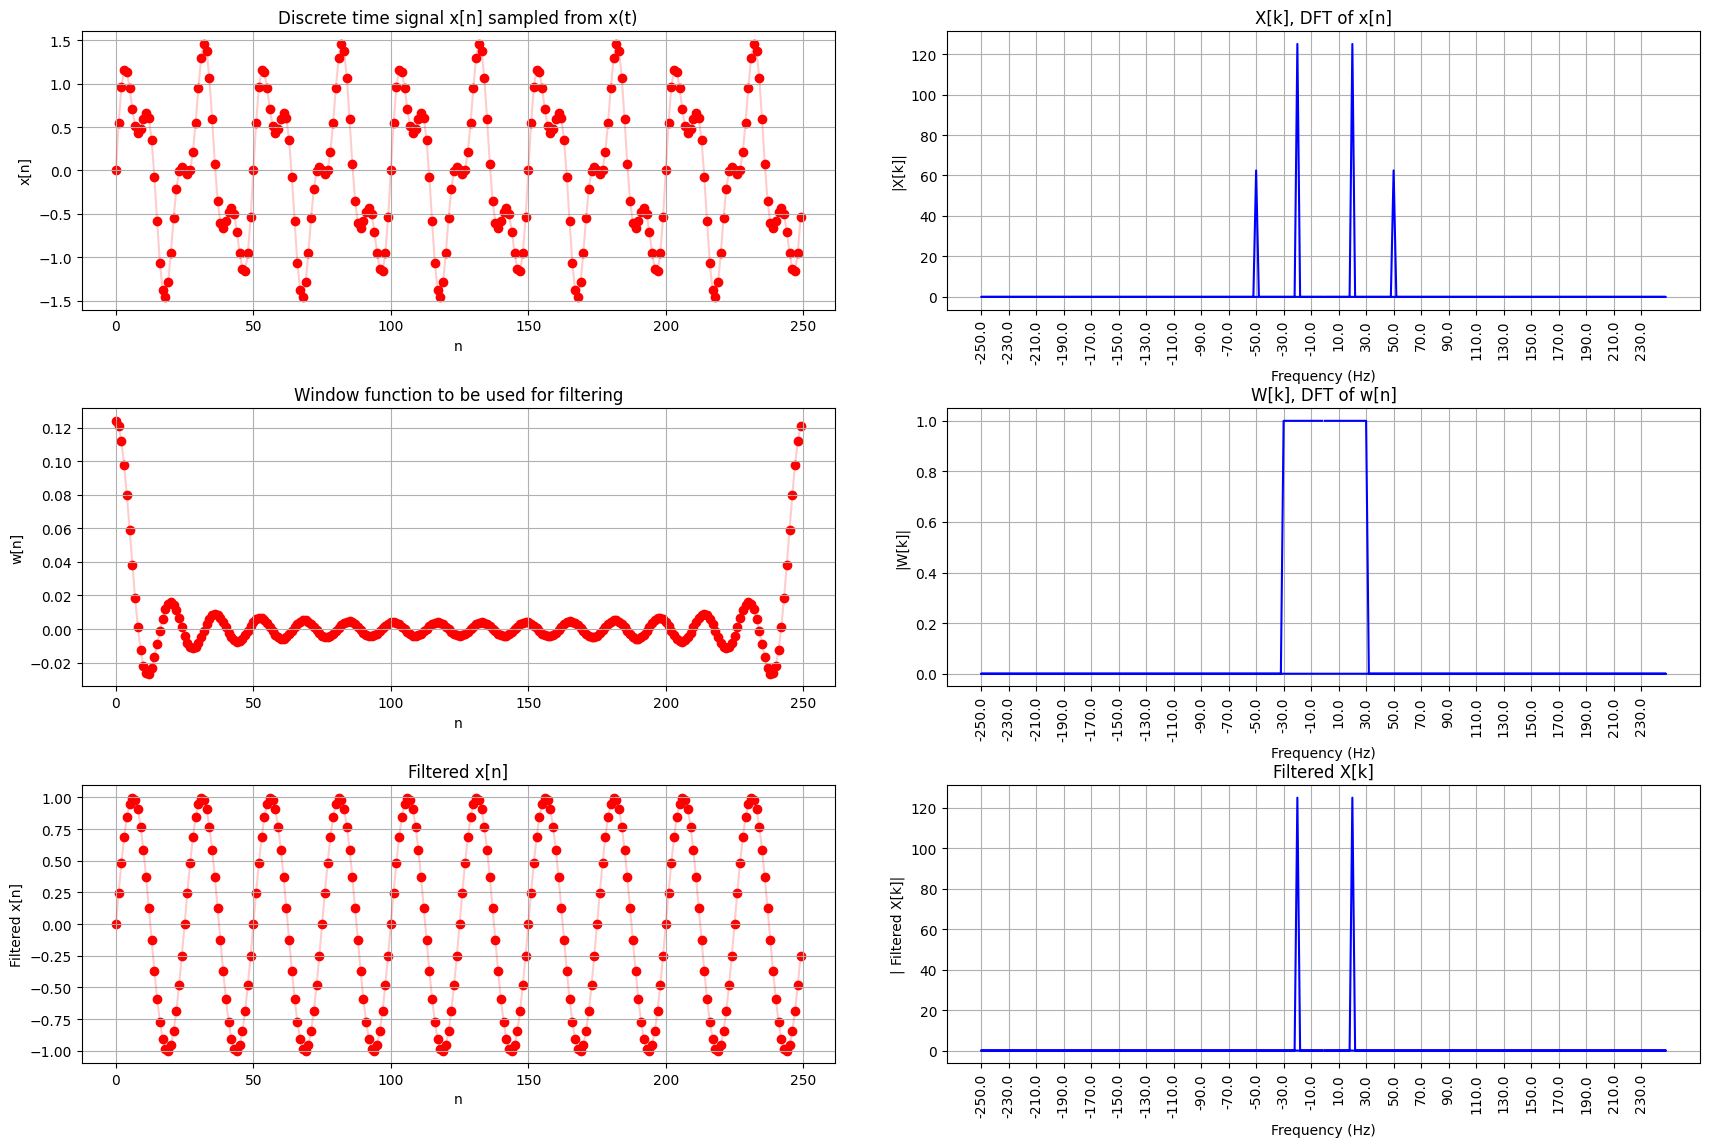

In [6]:
compute_and_plot_filtered_signal(x_combined, t_sampled, f_s, duration)

จากการสำรวจผลในทั้ง time domain (ภาพซ้ายล่าง) และ ผลใน frequency domain (ภาพขวาล่าง) พบว่าข้อมูลค่าความถี่ $\pm 50$ Hz ซึ่งเราสันนิษฐานว่าเป็นสัญญาณรบกวน ได้ถูกกำจัดออกไปได้

ในตัวอย่างนี้เราใช้ $W[k]$ ที่มีค่าเป็น 0 ในบริเวณค่า $k$ ที่เราต้องการกำจัด และมีค่าเป็น 1 ในบริเวณค่า $k$ ที่เหลือ ฟังก์ชัน window ที่มีลักษณะแบบนี้มีชื่อเรียกว่า rectangular window เนื่องจากเป็น window ที่มีหน้าตาเหมือนสีเหลี่ยมผืนผ้า (rectangle) นั่นเอง

หากได้มีโอกาสศึกษาเพิ่มเติมจะทราบว่า rectangular window มีข้อจำกัดหลายอย่าง ซึ่งในสถานการณ์จริง มี window อีกหลากหลายประเภทให้เลือกใช้ เช่น Hamming window, Hanning window, Kaiser ฯลฯ (สามารถดูตัวอย่าง window ได้จาก `scipy.signal.windows`) การเลือกใช้ window ก็ขึ้นอยู่กับสถานการณ์การทำงานของเรา